In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('/content/Large_Customer_Churn_Dataset.csv')

data.head()

,CustomerID,Gender,Age,Geography,Tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,IsActiveMember,Churn
0,1000001,Male,34,France,14,Two-year,21.58,7933.34,Bank transfer,1,No
1,1000002,Female,26,Spain,14,Month-to-month,27.71,5869.34,Credit card,0,Yes
2,1000003,Male,50,Germany,57,Two-year,111.12,6321.20,Bank transfer,1,No
3,1000004,Male,37,Spain,34,Month-to-month,55.49,7956.44,Bank transfer,0,Yes
4,1000005,Male,30,Spain,53,Two-year,62.48,4922.75,Direct debit,1,No


In [3]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

data.info()

print(data.isnull().sum())

data.describe()

Dataset contains 1000 rows and 11 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   int64  
 1   Gender          1000 non-null   object 
 2   Age             1000 non-null   int64  
 3   Geography       1000 non-null   object 
 4   Tenure          1000 non-null   int64  
 5   Contract        1000 non-null   object 
 6   MonthlyCharges  1000 non-null   float64
 7   TotalCharges    1000 non-null   float64
 8   PaymentMethod   1000 non-null   object 
 9   IsActiveMember  1000 non-null   int64  
 10  Churn           1000 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB
CustomerID        0
Gender            0
Age               0
Geography         0
Tenure            0
Contract          0
MonthlyCharges    0
TotalCharges      0
PaymentMethod     0
IsActiveMember    0
Chu

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,IsActiveMember
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.000500e+06,43.799000,30.760000,70.124000,4066.221960,0.503000
std,2.888194e+02,15.133857,17.025695,28.476322,2233.265597,0.500241
min,1.000001e+06,18.000000,1.000000,20.130000,201.450000,0.000000
25%,1.000251e+06,31.000000,17.000000,45.737500,2190.175000,0.000000
50%,1.000500e+06,44.000000,31.000000,70.670000,4039.230000,1.000000
75%,1.000750e+06,57.000000,46.000000,95.192500,5993.272500,1.000000
max,1.001000e+06,69.000000,59.000000,119.760000,7973.210000,1.000000


In [4]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Geography', 'Tenure', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'PaymentMethod', 'IsActiveMember',
       'Churn'],
      dtype='object')


In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

categorical_cols = ['Gender', 'Geography', 'Contract', 'PaymentMethod', 'Churn']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("Dataset after encoding:")
print(data.head())

Dataset after encoding:
   CustomerID  Age  Tenure  MonthlyCharges  TotalCharges  IsActiveMember  \
0     1000001   34      14           21.58       7933.34               1   
1     1000002   26      14           27.71       5869.34               0   
2     1000003   50      57          111.12       6321.20               1   
3     1000004   37      34           55.49       7956.44               0   
4     1000005   30      53           62.48       4922.75               1   

   Gender_Male  Geography_Germany  Geography_Italy  Geography_Spain  \
0         True              False            False            False   
1        False              False            False             True   
2         True               True            False            False   
3         True              False            False             True   
4         True              False            False             True   

   Geography_UK  Contract_One-year  Contract_Two-year  \
0         False              False 

<ipython-input-7-654257871963>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [8]:
print("Statistical Summary:")
print(data.describe())

Statistical Summary:
         CustomerID          Age       Tenure  MonthlyCharges  TotalCharges  \
count  1.000000e+03  1000.000000  1000.000000     1000.000000   1000.000000   
mean   1.000500e+06    43.799000    30.760000       70.124000   4066.221960   
std    2.888194e+02    15.133857    17.025695       28.476322   2233.265597   
min    1.000001e+06    18.000000     1.000000       20.130000    201.450000   
25%    1.000251e+06    31.000000    17.000000       45.737500   2190.175000   
50%    1.000500e+06    44.000000    31.000000       70.670000   4039.230000   
75%    1.000750e+06    57.000000    46.000000       95.192500   5993.272500   
max    1.001000e+06    69.000000    59.000000      119.760000   7973.210000   

       IsActiveMember  
count     1000.000000  
mean         0.503000  
std          0.500241  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


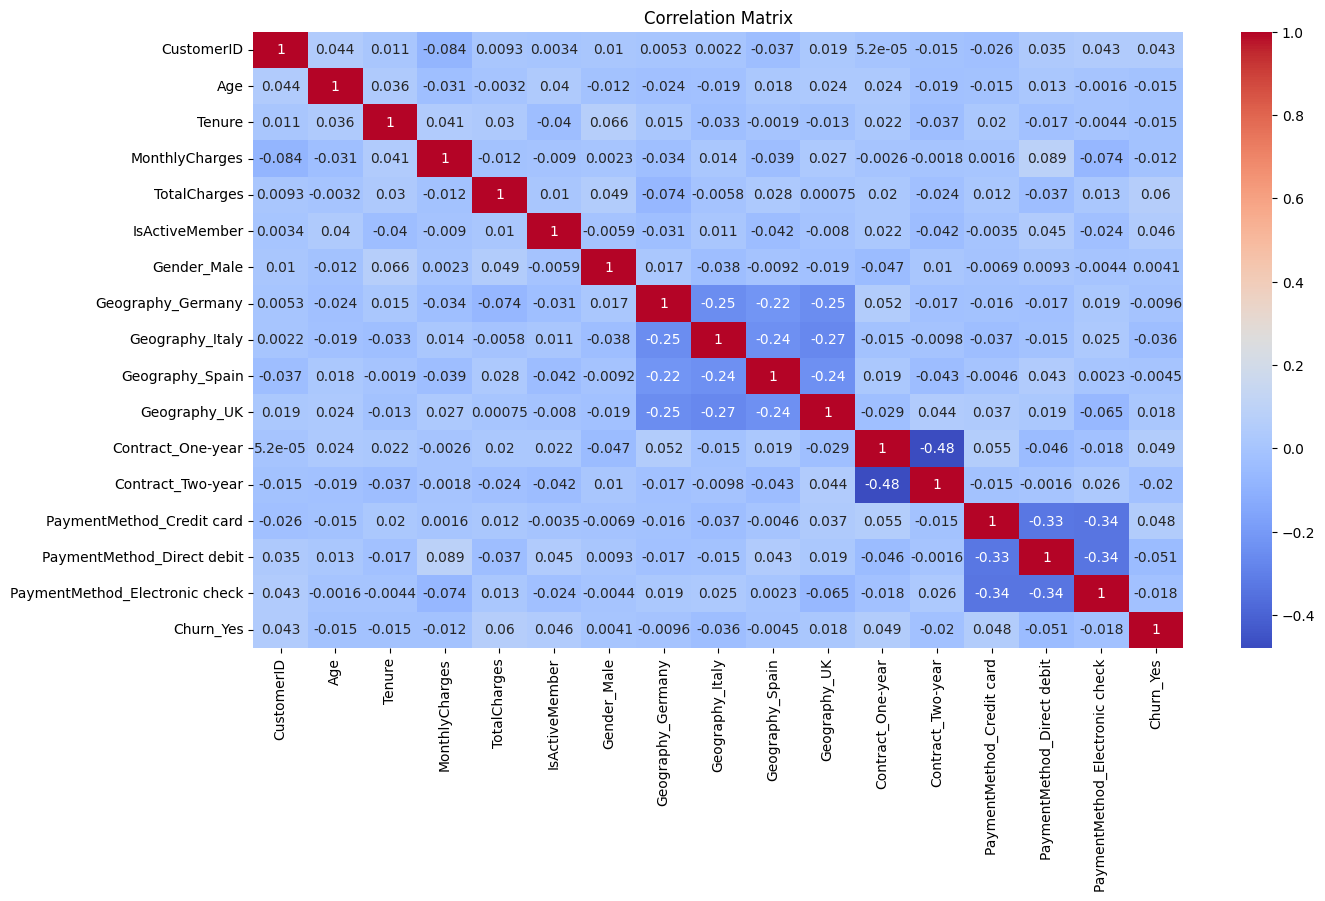

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

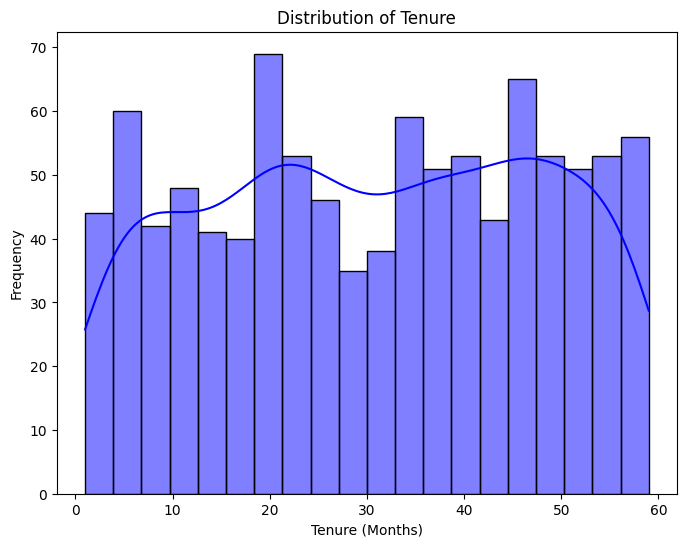

In [12]:
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')
plt.figure(figsize=(8, 6))
sns.histplot(data['Tenure'], bins=20, kde=True, color='blue')
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

In [14]:
data['ChargeRatio'] = data['MonthlyCharges'] / data['TotalCharges']

data['HighTenure'] = np.where(data['Tenure'] > 36, 1, 0)

print("Dataset after feature engineering:")
print(data.head())

Dataset after feature engineering:
   CustomerID  Age  Tenure  MonthlyCharges  TotalCharges  IsActiveMember  \
0     1000001   34      14           21.58       7933.34               1   
1     1000002   26      14           27.71       5869.34               0   
2     1000003   50      57          111.12       6321.20               1   
3     1000004   37      34           55.49       7956.44               0   
4     1000005   30      53           62.48       4922.75               1   

   Gender_Male  Geography_Germany  Geography_Italy  Geography_Spain  \
0         True              False            False            False   
1        False              False            False             True   
2         True               True            False            False   
3         True              False            False             True   
4         True              False            False             True   

   Geography_UK  Contract_One-year  Contract_Two-year  \
0         False         

In [17]:
X = data.drop(columns=['Churn_Yes'])
y = data['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.495
Classification Report:
              precision    recall  f1-score   support

       False       0.49      0.46      0.48       100
        True       0.50      0.53      0.51       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



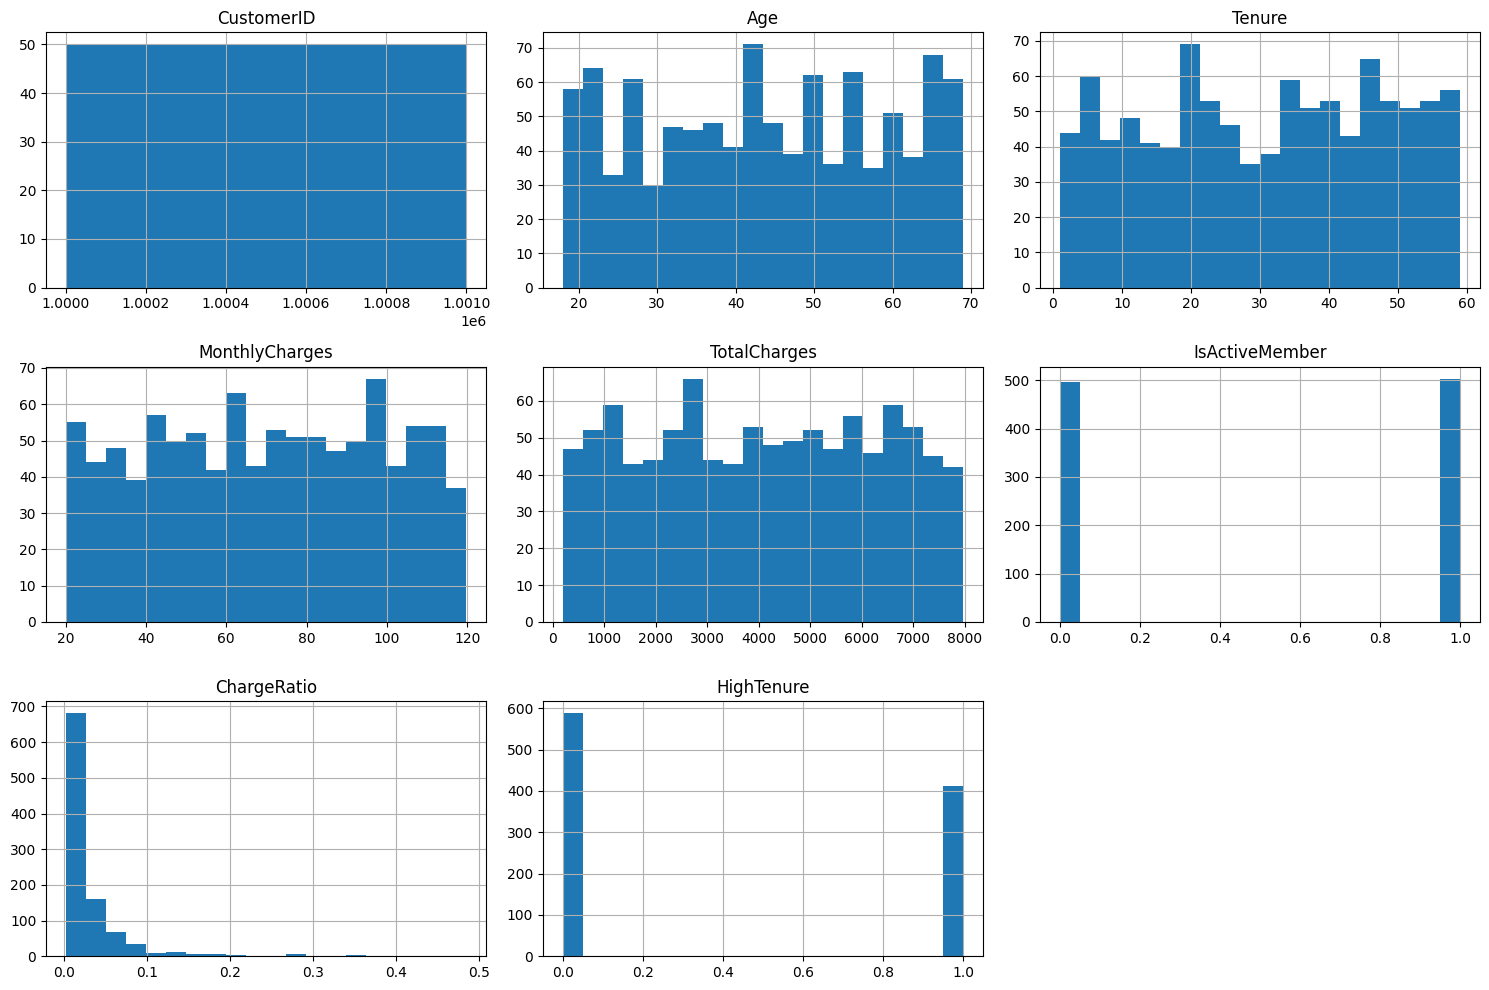

In [18]:
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

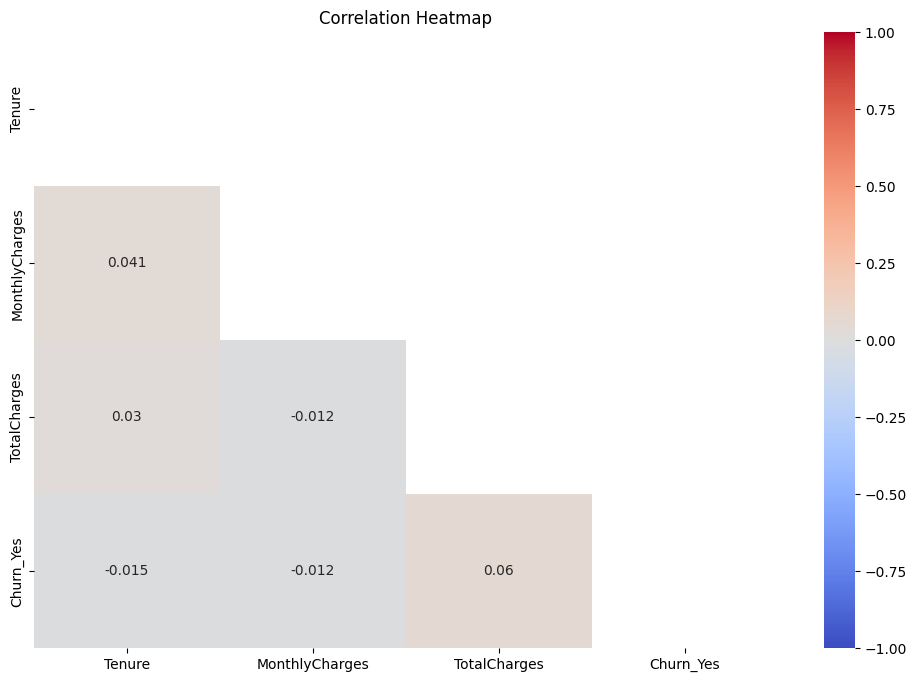

In [19]:
selected_numerical_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Yes']
corr_data = data[selected_numerical_features].corr()

mask = np.triu(np.ones_like(corr_data, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

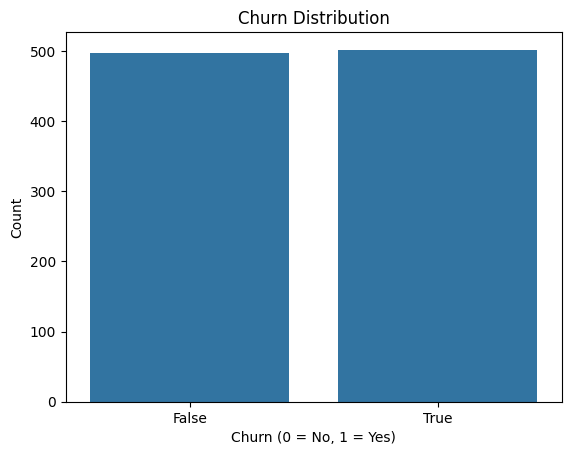

In [20]:
sns.countplot(x='Churn_Yes', data=data)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

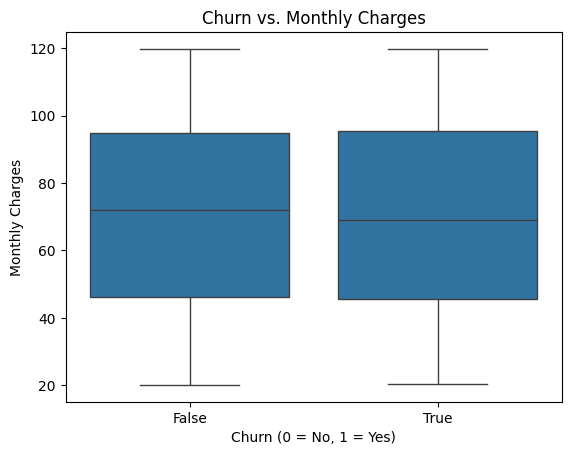

In [21]:
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=data)
plt.title('Churn vs. Monthly Charges')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges')
plt.show()

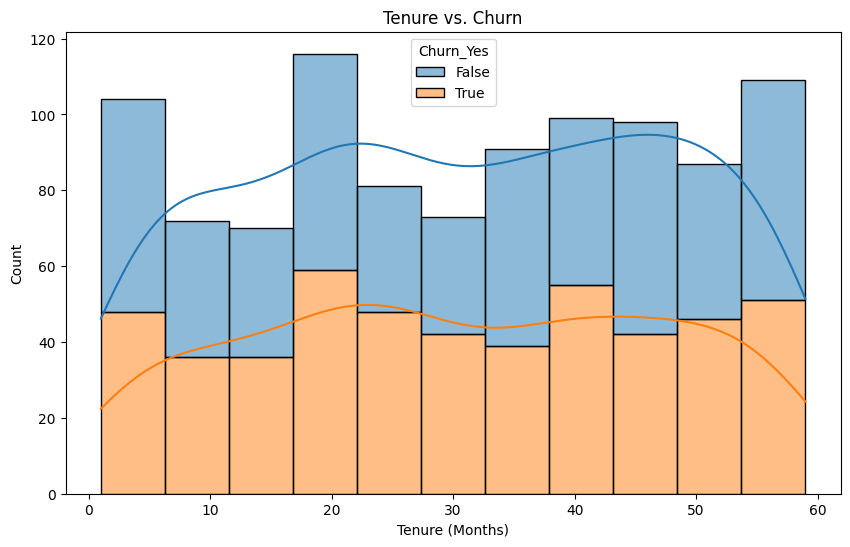

In [22]:
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Tenure', hue='Churn_Yes', multiple='stack', kde=True)
plt.title('Tenure vs. Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

In [23]:
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (700, 18), Test set: (300, 18)


In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[80 64]
 [84 72]]

Classification Report:
               precision    recall  f1-score   support

       False       0.49      0.56      0.52       144
        True       0.53      0.46      0.49       156

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.51      0.51      0.51       300


Accuracy: 0.5066666666666667


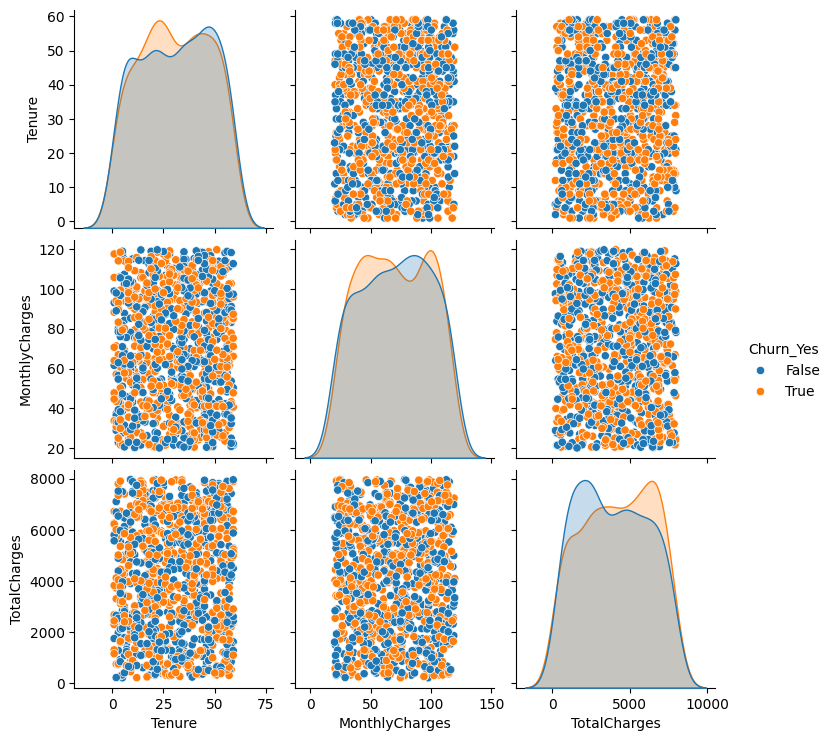

In [25]:
warnings.simplefilter(action='ignore', category=FutureWarning)

selected_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Yes']
sns.pairplot(data[selected_features], hue='Churn_Yes', diag_kind='kde')
plt.show()

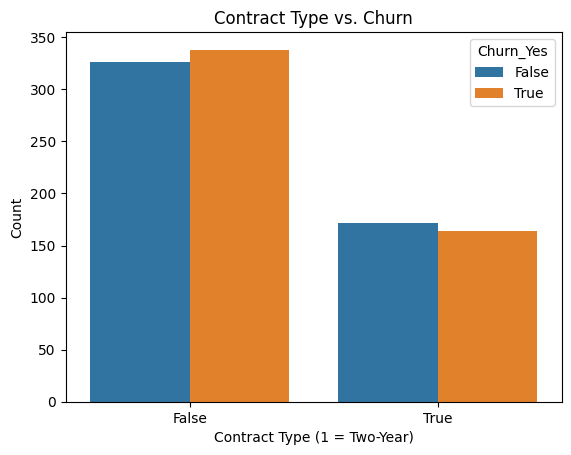

In [26]:
sns.countplot(x='Contract_Two-year', hue='Churn_Yes', data=data)
plt.title('Contract Type vs. Churn')
plt.xlabel('Contract Type (1 = Two-Year)')
plt.ylabel('Count')
plt.show()